In [2]:
!pip install -q transformers torch torchvision pillow timm

In [3]:
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
model.to(device)
model.eval()

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [24]:
image_path = "/content/beautiful-shot-zebras-group-green-field.jpg"
image = Image.open(image_path).convert("RGB")

In [25]:
inputs = processor(images = image, return_tensors = "pt")
inputs = {k: v.to(device) for k, v in inputs.items()}

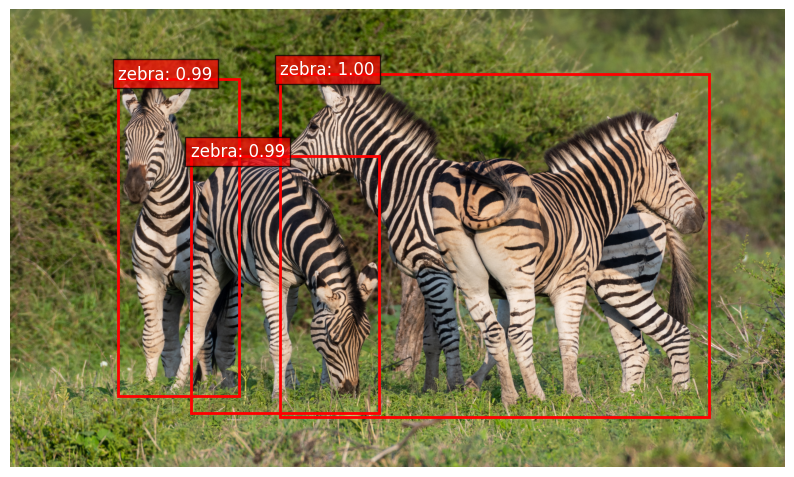

In [26]:
with torch.no_grad():
  outputs = model(**inputs)

# Post-processing
target_sizes = torch.tensor([image.size[::-1]]).to(device)
results = processor.post_process_object_detection(
    outputs,
    target_sizes = target_sizes,
    threshold = 0.7)[0]

# Visualize results
plt.figure(figsize = (10, 10))
plt.imshow(image)
ax = plt.gca()

for score, label , box in zip(results["scores"], results["labels"], results["boxes"]):
  x_min, y_min, x_max, y_max = box.tolist()
  ax.add_patch(
      plt.Rectangle(
          (x_min, y_min),
          x_max - x_min,
          y_max - y_min,
          fill = False,
          color = "red",
          linewidth = 2
          )
  )

  class_name = model.config.id2label[label.item()]
  ax.text(
      x_min,
      y_min,
      f"{class_name}: {score:.2f}",
      color = "white",
      fontsize = 12,
      bbox = dict(facecolor = "red", alpha = 0.7)
  )

plt.axis("off")
plt.show()

